In [1]:
#youtube video=  'https://www.youtube.com/watch?v=IU5fuoYBTAM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=14'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dict={'area':[1056,2600,1440,1521,1200,1170,2732,3300,1310,3700,1800,2785,1000,1100,2250,1175,1180,1540,2770,800],
       'bedrooms':[2,4,3,3,2,2,4,4,3,5,3,4,2,2,3,2,3,3,3,1],
     'price':[39.07,120.00,62.00,75.00,51.00,38.00,135.00,155.00,50.00,167.00,82.00,140.00,38.00,40.00,101.00,42.00,48.00,60.0,102.0,32.0]
     }

In [4]:
y=pd.DataFrame(dict)

In [5]:
y.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [6]:
y.tail()

,area,bedrooms,price
15,1175,2,42.0
16,1180,3,48.0
17,1540,3,60.0
18,2770,3,102.0
19,800,1,32.0


In [7]:
y.sample(5)

,area,bedrooms,price
7,3300,4,155.0
13,1100,2,40.0
12,1000,2,38.0
16,1180,3,48.0
5,1170,2,38.0


In [8]:
from sklearn import preprocessing

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(y.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y=sy.fit_transform(y['price'].values.reshape(y.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
y.shape[0]

20

In [11]:
len(y['area'])

20

In [12]:
print(scaled_X.shape[1])    #shape of the columns
print(scaled_X.shape[0])    #shape of the rows

2
20


In [13]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(number_of_features)
    b=0
    total_samples= X.shape[0]
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+b   #w1*area + w2*bedrooms
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

In [14]:
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

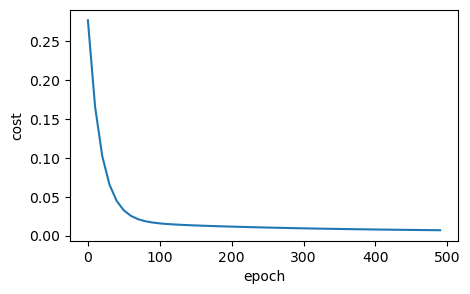

In [15]:
plt.figure(figsize=(5, 3))
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)
plt.show()

In [16]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [17]:
number_of_features=2
w=np.ones(number_of_features)
w

array([1., 1.])

In [18]:
sx.transform([[2600,4]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [19]:
sy.inverse_transform([[1,0]])

array([[167.,  32.]])

In [20]:
w

array([1., 1.])

In [21]:
b

-0.23034857438407422

In [22]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_X[0] + w[1]*scaled_X[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [23]:
predict(2600,4,w,b)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


185.9460459064258

In [24]:
predict(1000,2,w,b)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


43.96328728573618

# Stochastic Gadient descent


In [25]:
import random
random.randint(0,6)

0

In [26]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    #numpy array with 1row and column equal to number of features. In our case
    #number_of_features = 3 i.e(area,bedroom,price)
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples= X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b   #w1*area + w2*bedrooms
        
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*(sample_y-y_predicted)
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.square(sample_y-y_predicted)
        
        if i%100==0:  #at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list


In [27]:

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

w_sgd,b_sgd,cost_sgd

(array([0.70632905, 0.67479118]), -0.23004527471689348, 0.001686000237845025)

In [28]:
w,b,cost

(array([1., 1.]), -0.23034857438407422, 0.0068641890429808105)

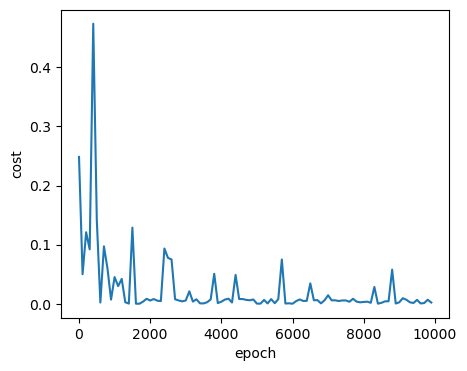

In [29]:
plt.figure(figsize=(5, 4))
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

In [30]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.4519980701221

# mini batch grandient descent

In [31]:
# Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights 
#using derivaties

# Stochastic GD: we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights

# Mini batch GD: we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [32]:
y

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [33]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [34]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [35]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [36]:
np.random.permutation(20)

array([ 6,  0, 13,  2,  4, 17, 14, 11,  1, 16,  3,  9,  5, 10,  7, 12,  8,
       19, 15, 18])

In [37]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
                                         
            w = w-learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71016763, 0.67816499]), -0.2334594159660734, 0.0025962420704700264)

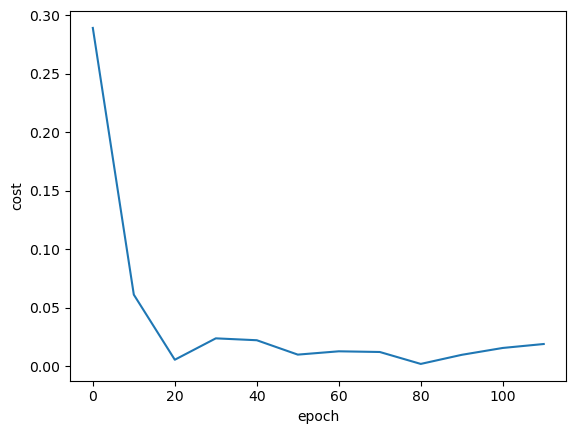

In [38]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [39]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]


In [40]:
predict(2600,4,w,b)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.6543340864846

In [41]:
predict(1000,2,w,b)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


29.982952881987266

In [42]:
predict(1500,3,w,b)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.40078520181518